<center><h1> NEW YORK CITY TAXI TRIP DURATION </h1></center>

<center>
<img src="https://newyorkmonamour.fr/wp-content/uploads/2016/10/taxi-jaune-a-new-york.jpg">
</center>
<center>
<a href='https://newyorkmonamour.fr/wp-content/uploads/2016/10/taxi-jaune-a-new-york.jpg'>TAXIS NEW YORK</a>
</center>

<h3>Importer les données</h3>

In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
#### Bibliotheques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import seaborn as sns

#import contextily as ctx   #conda install contextily --channel conda-forge



In [2]:
#### Lecture des données
train_data = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

#### Affichage des données
print('Data\n',train_data.head())
print('Data Shape : ',train_data.shape)

Data
           id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         

In [3]:
#### Structure des données
pd.options.display.max_columns = None
print("Description des données : \n",train_data.describe())
#print("Description de Trip_Duration : \n",train_data.trip_duration.describe())

Description des données : 
           vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+0

In [4]:
#### Nombre de lignes dupliquées
train_data.duplicated().sum()

0

In [5]:
#### Valeurs NULL dans chaque colonne dans le dataset
print(train_data.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


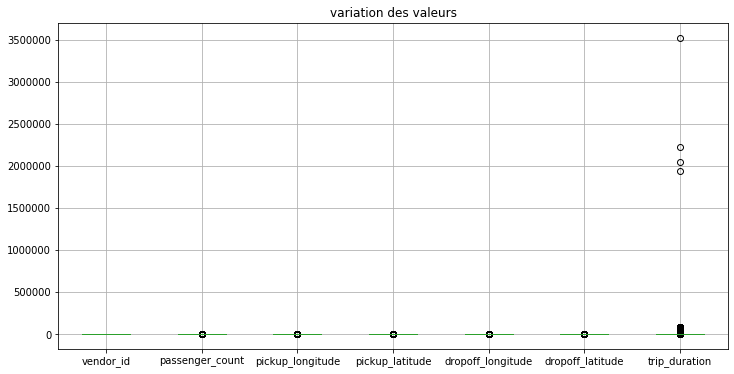

In [6]:
#### Répartition des données d'entrainement de chaque colonne
plt.figure(figsize=(12,6))
plt.title("variation des valeurs")
train_data.boxplot(grid=True)
#train_data.boxplot(column="trip_duration",grid=False)

**Durée de voyage**

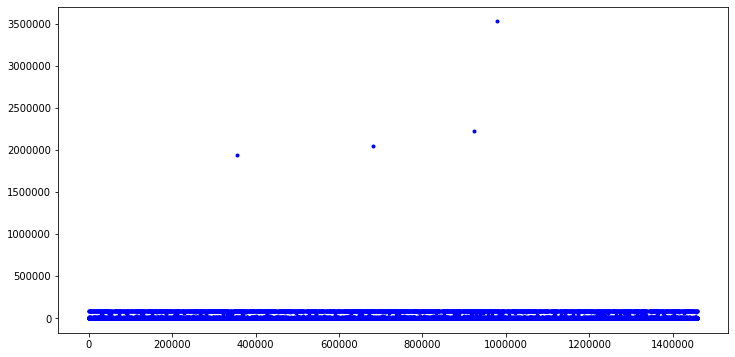

In [7]:
plt.figure(figsize=(12,6))
plt.plot(train_data.trip_duration,'b.')
plt.show()

Anomalies dans les durées de voyage :  10848  /  0.7437044268512399 %


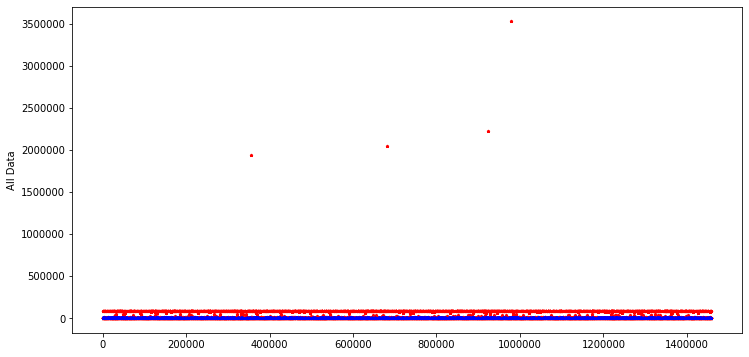

In [8]:
#### Filtrer les données par rapport à la durées de voyage (<7200s >60s)

plt.figure(figsize=(12,6))
plt.ylabel('All Data')

plt.plot(train_data[((train_data.trip_duration > (3600*2)) | (train_data.trip_duration < 60))].trip_duration,'r*',alpha = 1,markersize=3)
filter = ((train_data.trip_duration > (3600*2)) | (train_data.trip_duration < 60))
print('Anomalies dans les durées de voyage : ',(train_data[filter].shape[0]),' / ',(train_data[filter].shape[0] / train_data.shape[0] * 100),'%')
plt.plot(train_data[~((train_data.trip_duration > (3600*2)) | (train_data.trip_duration < 60))].trip_duration,'b.',alpha = 1,markersize=3)
plt.show()

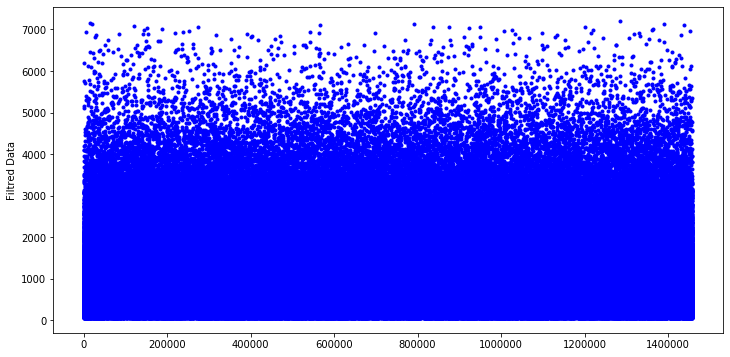

1447796


In [9]:
#### Données filtées
train_data = train_data[~((train_data.trip_duration <60) | (train_data.trip_duration > (3600*2)))]

plt.figure(figsize=(12,6))
plt.ylabel('Filtred Data')
plt.plot(train_data.trip_duration, marker='.', color = 'b', linestyle='None')
plt.show()
print(train_data.shape[0])

**Nombre de passager**

1447796
Voyages avec (nb_passeger = 0) : 17


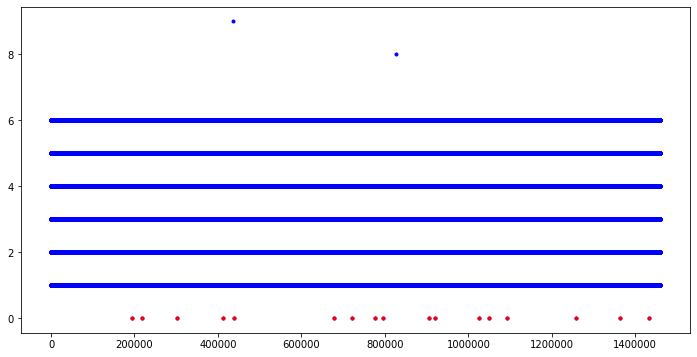

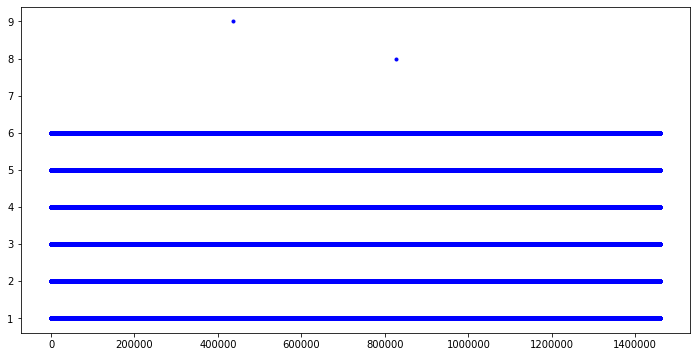

(1447779, 11)


In [10]:
print(train_data.shape[0])
print('Voyages avec (nb_passeger = 0) : {}'.format(train_data[train_data.passenger_count == 0].shape[0]))
plt.figure(figsize=(12,6))
plt.plot(train_data.passenger_count, 'b.', train_data[(train_data.passenger_count == 0)].passenger_count, 'r.')
plt.show()
train_data = train_data[~(train_data.passenger_count == 0)]
plt.figure(figsize=(12,6))
plt.plot(train_data.passenger_count, marker='.', color = 'b', linestyle='None')
plt.show()
print (train_data.shape)

**Position**

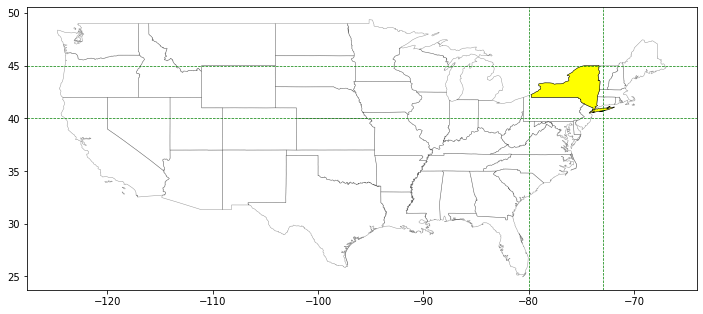

In [11]:
#### USA - New York - New York City

fig, ax = plt.subplots(1, 1, figsize=(12,8))

usa = geopandas.read_file('./states/states.shp')
usa.plot(ax=ax, alpha=.4, edgecolor='black', color='white', linewidth=.5)
usa[usa.STATE_NAME=='New York'].plot(ax=ax, alpha=1, linewidth=.5, edgecolor='k',color='yellow')

longitudeMin = plt.axvline(x=-80, color='g', linestyle='--', linewidth=.7)
longitudeMax = plt.axvline(x=-73, color='g', linestyle='--', linewidth=.7)
latitudeMin = plt.axhline(y=45, color='g', linestyle='--', linewidth=.7)
latitudeMax = plt.axhline(y=40, color='g', linestyle='--', linewidth=.7)

#ax.axis('off')
#plt.savefig('./usa.png', dpi=1080, transparent=True)
plt.show()

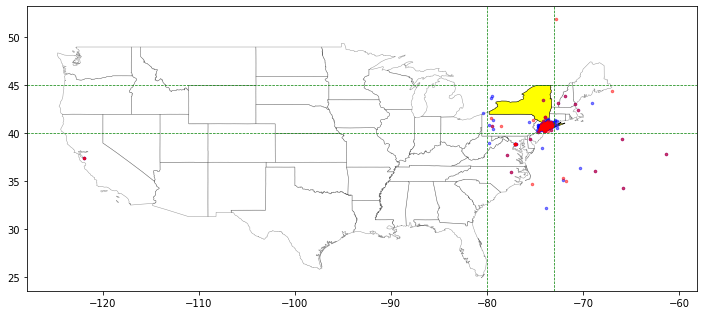

1447779


In [12]:
#### Taxis Pickups AND Dropoffs positions

fig, ax = plt.subplots(1, 1, figsize=(12,8))

usa = geopandas.read_file('./states/states.shp')
usa.plot(ax=ax, alpha=.4, edgecolor='black', color='white', linewidth=.5)
usa[usa.STATE_NAME=='New York'].plot(ax=ax, alpha=1, linewidth=.5, edgecolor='black',color= 'yellow')

plt.plot(train_data.dropoff_longitude,train_data.dropoff_latitude, marker='.' ,color = 'b' ,linestyle='None' ,alpha = .5 ,markersize = 5)
plt.plot(train_data.pickup_longitude ,train_data.pickup_latitude ,marker='.' ,color = 'r' ,linestyle='None' ,alpha = .5 ,markersize = 5)

longitudeMin = plt.axvline(x=-80, color='g', linestyle='--', linewidth=.7)
longitudeMax = plt.axvline(x=-73, color='g', linestyle='--', linewidth=.7)
latitudeMin = plt.axhline(y=45, color='g', linestyle='--', linewidth=.7)
latitudeMax = plt.axhline(y=40, color='g', linestyle='--', linewidth=.7)

#plt.savefig('./usa_taxis_position.png',dpi=1080, transparent=True)
plt.show()
print(train_data.shape[0])

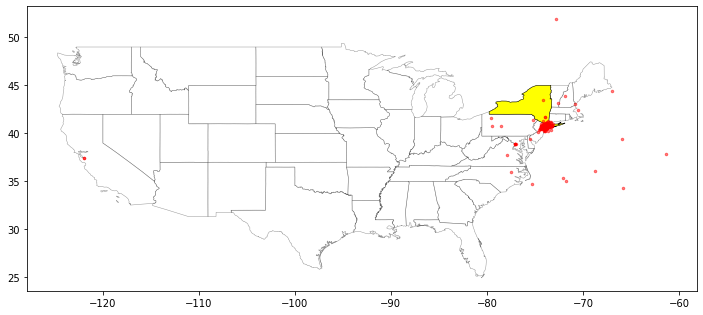

In [13]:
#### Taxis Pickups positions

fig, ax = plt.subplots(1, 1, figsize=(12,8))

usa = geopandas.read_file('./states/states.shp')
usa.plot(ax=ax, alpha=.4, edgecolor='black', color='white', linewidth=.5)
usa[usa.STATE_NAME=='New York'].plot(ax=ax, alpha=1, linewidth=.5, edgecolor='k',color= 'yellow')

plt.plot(train_data.pickup_longitude ,train_data.pickup_latitude ,marker='.' ,color = 'r' ,linestyle='None' ,alpha = .5 ,markersize = 5)

#plt.savefig('./usa_taxis_pickup_position.png',dpi=1080, transparent=True)
plt.show()

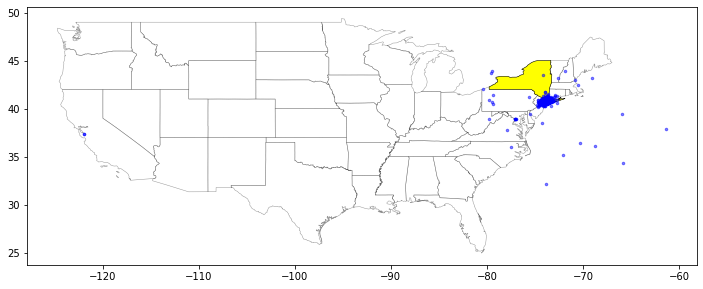

In [14]:
#### Taxis Dropoffs positions

fig, ax = plt.subplots(1, 1, figsize=(12,8))

usa = geopandas.read_file('./states/states.shp')
usa.plot(ax=ax, alpha=.4, edgecolor='black', color='white', linewidth=.5)
usa[usa.STATE_NAME=='New York'].plot(ax=ax, alpha=1, linewidth=.5, edgecolor='k',color= 'yellow')

plt.plot(train_data.dropoff_longitude,train_data.dropoff_latitude, marker='.' ,color = 'b' ,linestyle='None' ,alpha = .5 ,markersize = 5)

#plt.savefig('./usa_taxis_dropoff_position.png',dpi=1080, transparent=True)
plt.show()

Après filtre dropoff:  1447747
Après filtre pickup:  1447745


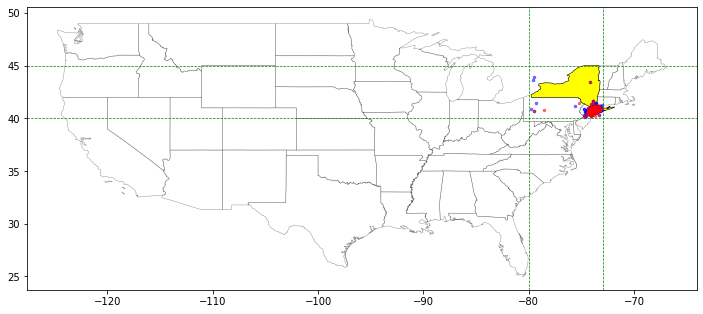

In [15]:
train_data = train_data[~((train_data.dropoff_longitude <= -80) | (train_data.dropoff_longitude >= -73) |
                 (train_data.dropoff_latitude <= 40) | (train_data.dropoff_latitude >= 45)) ]
print('Après filtre dropoff: ',train_data.shape[0])

train_data = train_data[~((train_data.pickup_longitude <= -80) | (train_data.pickup_longitude >= -73) |
                 (train_data.pickup_latitude <= 40) | (train_data.pickup_latitude >= 45))]
print('Après filtre pickup: ',train_data.shape[0])

fig, ax = plt.subplots(1, 1, figsize=(12,8))
usa = geopandas.read_file('./states/states.shp')
usa.plot(ax=ax, alpha=.4, edgecolor='black', color='white', linewidth=.5)
usa[usa.STATE_NAME=='New York'].plot(ax=ax, alpha=1, linewidth=.5, edgecolor='k',color= 'yellow')

plt.plot(train_data.dropoff_longitude, train_data.dropoff_latitude, marker='.', color = 'b', linestyle='None', alpha = .5, markersize = 5)
plt.plot(train_data.pickup_longitude, train_data.pickup_latitude, marker='.', color = 'r', linestyle='None', alpha = .5, markersize = 5)

longitudeMin = plt.axvline(x=-80, color='g', linestyle='--', linewidth=.7)
longitudeMax = plt.axvline(x=-73, color='g', linestyle='--', linewidth=.7)
latitudeMin = plt.axhline(y=45, color='g', linestyle='--', linewidth=.7)
latitudeMax = plt.axhline(y=40, color='g', linestyle='--', linewidth=.7)

#plt.savefig('./nyc_taxis_filtered_positions.png',dpi=1080, transparent=True)
plt.show()

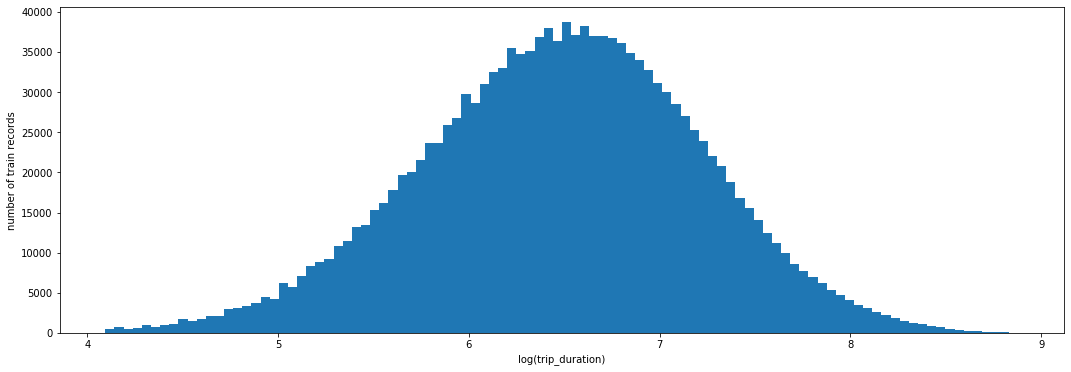

In [16]:
#transformation logarithmique de trip_duration
plt.subplots(figsize=(18,6))
train_data['trip_duration'] = np.log(train_data['trip_duration'].values)
plt.hist(train_data['trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

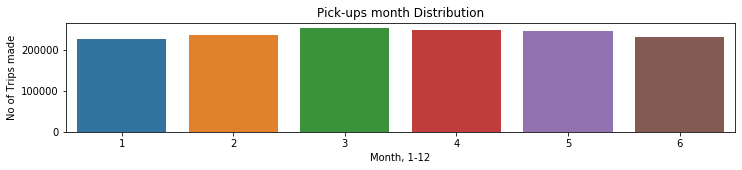

In [17]:
#Datetyping the dates
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

train_data.drop(['dropoff_datetime'], axis=1, inplace=True) #as we don't have this feature in the testset

#Date features creations and deletions
train_data['month'] = train_data.pickup_datetime.dt.month
train_data['week'] = train_data.pickup_datetime.dt.week
train_data['weekday'] = train_data.pickup_datetime.dt.weekday
train_data['hour'] = train_data.pickup_datetime.dt.hour
train_data['minute'] = train_data.pickup_datetime.dt.minute
train_data['minute_oftheday'] = train_data['hour'] * 60 + train_data['minute']
train_data.drop(['minute'], axis=1, inplace=True)

test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test.drop(['minute'], axis=1, inplace=True)

train_data.drop(['pickup_datetime'], axis=1, inplace=True)



plt.figure(figsize=(12,2))

data = train_data.groupby('month').aggregate({'id':'count'}).reset_index()
sns.barplot(x='month',y='id',data=data)
plt.title('Pick-ups month Distribution')
plt.xlabel('Month, 1-12')
plt.ylabel('No of Trips made')
plt.show()

Calculer la distance et la vitesse

In [18]:
#Function aiming at calculating distances from coordinates
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

#Add distance feature
train_data['distance'] = ft_haversine_distance(train_data['pickup_latitude'].values,
                                                 train_data['pickup_longitude'].values, 
                                                 train_data['dropoff_latitude'].values,
                                                 train_data['dropoff_longitude'].values)
test['distance'] = ft_haversine_distance(test['pickup_latitude'].values, 
                                                test['pickup_longitude'].values, 
                                                test['dropoff_latitude'].values, 
                                                test['dropoff_longitude'].values)

In [19]:
#Function aiming at calculating the direction
def ft_degree(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371 #km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))



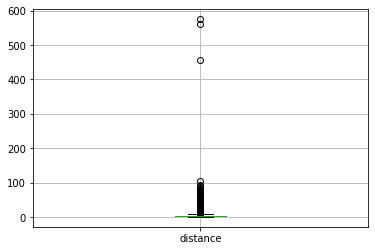

In [20]:
#Visualize distance outliers
train_data.boxplot(column='distance', return_type='axes');

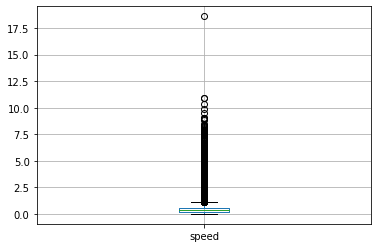

In [21]:
#Remove distance outliers
train_data = train_data[(train_data.distance < 200)]
#Create speed feature
train_data['speed'] = train_data.distance / train_data.trip_duration
#Visualize speed feature
train_data.boxplot(column='speed', return_type='axes');

In [22]:
#Remove speed outliers
train_data = train_data[(train_data.speed < 12)]
train_data.drop(['speed'], axis=1, inplace=True)


In [23]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,week,weekday,hour,minute_oftheday,distance
vendor_id,1,0.287161,0.0178367,0.00213277,0.00603966,0.00457281,0.00509927,-0.006183,-0.00165732,0.00112852,0.00914438,0.00911896,0.00809721
passenger_count,0.287161,1,0.0050123,-0.00538315,0.000369644,-0.00285842,0.0145001,-0.00227272,0.0048551,0.0252968,0.00896863,0.00900467,0.0100279
pickup_longitude,0.0178367,0.0050123,1,-0.138639,0.271201,0.0501488,0.242354,0.00667638,0.0110272,-0.0306699,0.0194407,0.0192525,0.514109
pickup_latitude,0.00213277,-0.00538315,-0.138639,1,0.0582168,0.425626,-0.194897,-0.00294648,-0.0074098,-0.034431,0.0130838,0.0131231,-0.31697
dropoff_longitude,0.00603966,0.000369644,0.271201,0.0582168,1,0.136222,0.172711,0.00779291,0.0102548,-0.00222759,-0.043264,-0.0434273,0.363632
dropoff_latitude,0.00457281,-0.00285842,0.0501488,0.425626,0.136222,1,-0.160309,-0.00148023,-0.00417067,-0.0242632,0.0157721,0.0158597,-0.157295
trip_duration,0.00509927,0.0145001,0.242354,-0.194897,0.172711,-0.160309,1,0.0518413,0.0298957,-0.0311034,0.0392435,0.0387059,0.660799
month,-0.006183,-0.00227272,0.00667638,-0.00294648,0.00779291,-0.00148023,0.0518413,1,0.721274,-0.0146772,-0.00340711,-0.00344888,0.0172907
week,-0.00165732,0.0048551,0.0110272,-0.0074098,0.0102548,-0.00417067,0.0298957,0.721274,1,0.0385735,-0.0168854,-0.0169322,0.0227552
weekday,0.00112852,0.0252968,-0.0306699,-0.034431,-0.00222759,-0.0242632,-0.0311034,-0.0146772,0.0385735,1,-0.0842085,-0.0840986,0.00860909


#  les modèles

In [24]:
randomForest=pd.DataFrame()
regression=pd.DataFrame()
svmOut=pd.DataFrame()
Id=test.id.values
test=test.drop(['id','pickup_datetime','store_and_fwd_flag'], axis=1)
target=train_data.trip_duration.values
train_data = train_data.drop(['id','trip_duration','store_and_fwd_flag'], axis=1)
train_data.fillna(0,inplace=True)


In [25]:
train_data.dtypes
test.dtypes


vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
month                  int64
week                   int64
weekday                int64
hour                   int64
minute_oftheday        int64
distance             float64
dtype: object

### Arbre de décision :

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=2, min_samples_leaf=50, min_samples_split=75)

In [27]:
rf_model.fit(train_data.values, target)
predictions=rf_model.predict(test.values)
predictions[:5]

array([6.613138  , 6.54301474, 6.06021931, 6.8064932 , 5.73224617])

In [28]:
randomForest['trip_duration'] = np.exp(predictions) - 1
randomForest['id']=Id
randomForest[['id', 'trip_duration']].to_csv('./submissionRForest.csv.gz', index=False, compression='gzip')
randomForest['trip_duration'][:5]

0    743.816591
1    693.376793
2    427.469394
3    902.696163
4    307.661799
Name: trip_duration, dtype: float64

###  régression linéaire :

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_data.values, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predictions=reg.predict(test)
predictions[:5]


array([6.48609404, 6.43931847, 6.33919408, 6.8405115 , 6.19815211])

In [38]:

print ('Score = ',reg.score(test,predictions))

Score =  0.7850181470718259


In [32]:
regression['trip_duration'] = np.exp(predictions) - 1
regression['id']=Id
regression[['id', 'trip_duration']].to_csv('./submissionRegression.csv.gz', index=False, compression='gzip')
regression['trip_duration'][:5]

0    654.956214
1    624.980031
2    565.339702
3    933.967247
4    490.839338
Name: trip_duration, dtype: float64

### SVM :

In [33]:
from sklearn.svm import LinearSVR
from sklearn import metrics

svm = LinearSVR()
svm.fit(train_data['distance'].values.reshape(-1, 1), target)

C:\Users\IMAD-BZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [40]:
predictions=svm.predict(test['distance'].values.reshape(-1, 1))
predictions[:5]


array([6.4527099 , 6.45443814, 6.25844508, 6.79296854, 6.21186891])

In [42]:
print('Score est =',svm.score(train_data['distance'].values.reshape(-1, 1), target))
svmOut['id']=Id
svmOut['trip_duration'] = np.exp(predictions) - 1
svmOut[['id', 'trip_duration']].to_csv('./submissionSvm.csv.gz', index=False, compression='gzip')
svmOut[:5]

Score est = 0.42281967504016504


,id,trip_duration
0,id3004672,633.419176
1,id3505355,634.516554
2,id1217141,521.406008
3,id2150126,890.556255
4,id1598245,497.632280
